In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
%matplotlib inline

# PART - A

## 1. Data Understanding & Exploration

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
car_name_df = pd.read_csv('Car name.csv')
car_name_df.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [3]:
car_attr_df = pd.read_json('Car-Attributes.json')
car_attr_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### C. Merge both the DataFrames together to form a single DataFrame

In [4]:
car_df = pd.concat([car_name_df, car_attr_df], axis=1)
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


### D. Print 5 point summary of the numerical features and share insights.

In [5]:
car_name_df_shape = car_name_df.shape
car_attr_df_shape = car_attr_df.shape
car_df_shape = car_df.shape
print(f' The shape of car_name_df dataset: {car_name_df_shape} ; The number of rows: {car_name_df_shape[0]} ; The number of columns: {car_name_df_shape[1]}')
print(f' The shape of car_attr_df dataset: {car_attr_df_shape}  ; The number of rows: {car_attr_df_shape[0]}  ; The number of columns: {car_attr_df_shape[1]}')
print(f' The shape of car_df dataset: {car_df_shape}  ;  The number of rows: {car_df_shape[0]}  ; The number of columns: {car_df_shape[1]}')

 The shape of car_name_df dataset: (398, 1) ; The number of rows: 398 ; The number of columns: 1
 The shape of car_attr_df dataset: (398, 8)  ; The number of rows: 398  ; The number of columns: 8
 The shape of car_df dataset: (398, 9)  ;  The number of rows: 398  ; The number of columns: 9


In [6]:
car_df.describe(include='all')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398,398.000000,398.000000,398.000000,398.0,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN
mean,NaN,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,NaN,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,NaN,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,NaN,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,NaN,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,NaN,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


Observations:

* The greater difference between 75% & max values of displacement columns **disp** & weight **wt** indicates the possibility of outliers.
* As we see the data for horsepower **hp** is continuous variable but the five-point summary doesn't provide its properties like mean, std..etc.making us suspect some missing values or unexpected values, we shall find and fix that.

## 2. Data Preparation & Analysis

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [7]:
car_df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [8]:
percent_missing = car_df.isnull().sum() * 100 / len(car_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
car_name,0.0
mpg,0.0
cyl,0.0
disp,0.0
hp,0.0
wt,0.0
acc,0.0
yr,0.0
origin,0.0


### B. Check for duplicate values in the data and impute with the best suitable approach. 

In [9]:
car_df.duplicated().sum()

0

Observations:
* As there are no duplicate entries in the data frame so we don't need to impute them.

### C. Plot a pairplot for all features

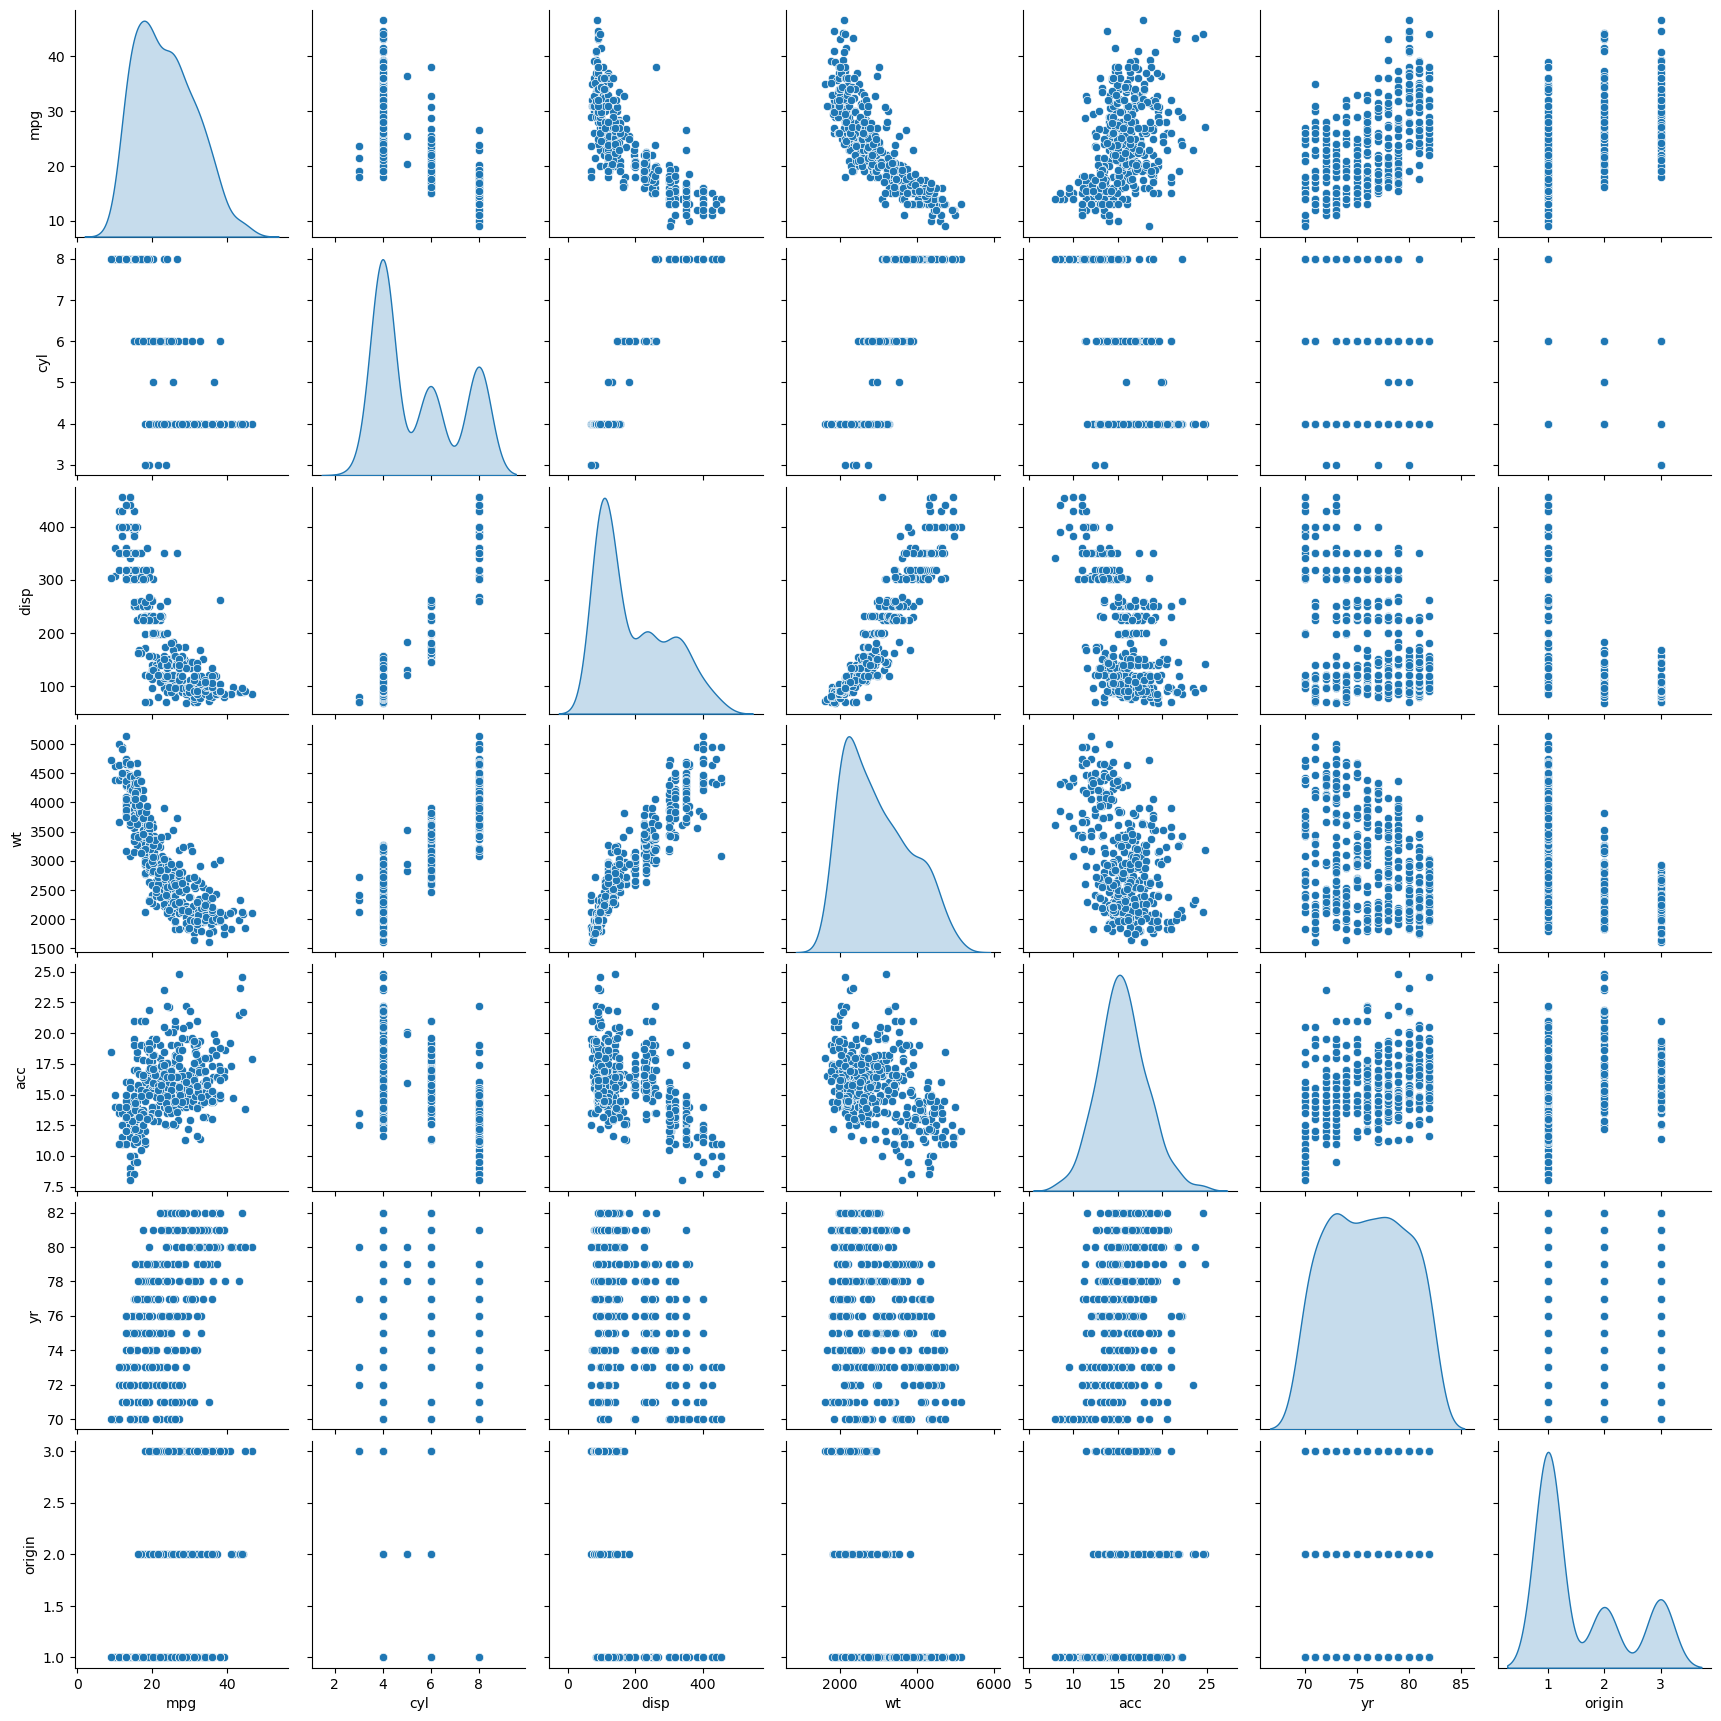

In [10]:
sns.pairplot(car_df, diag_kind='kde');

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='wt', ylabel='disp'>

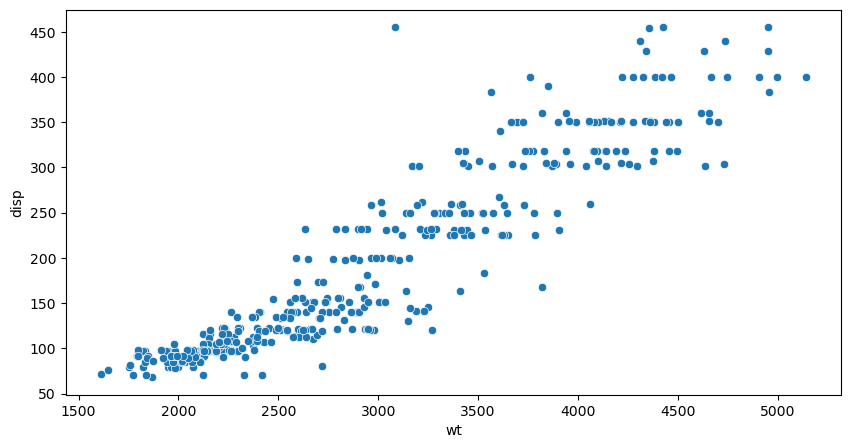

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='wt', y = 'disp',data=car_df)

<AxesSubplot:xlabel='wt', ylabel='disp'>

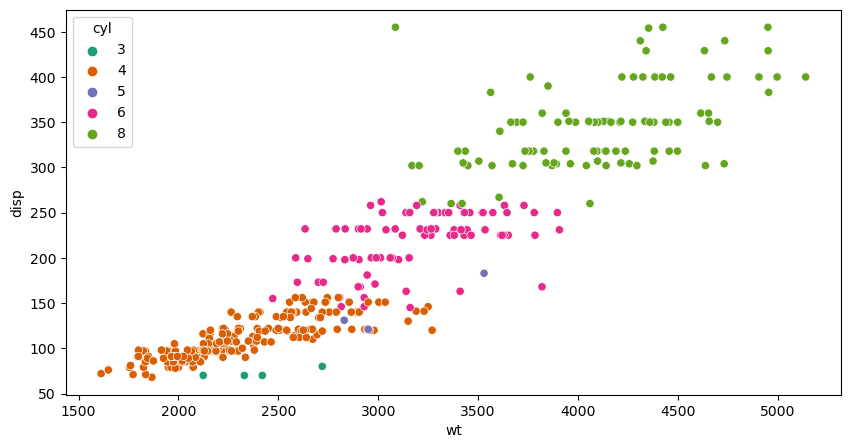

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='wt', y = 'disp',data=car_df, hue='cyl', palette='Dark2')

### E. Share insights for Q2.d.

Observations:

* Here weight increases, displacement also increases.Hence they are positively correlated 
* Lower values of disp & wt less cyl exists and for high values cyl also increasing.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

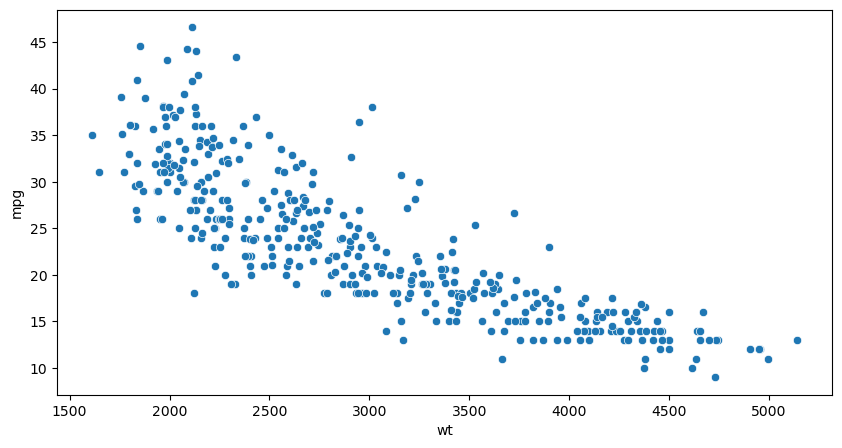

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='wt', y = 'mpg',data=car_df)

<AxesSubplot:xlabel='wt', ylabel='mpg'>

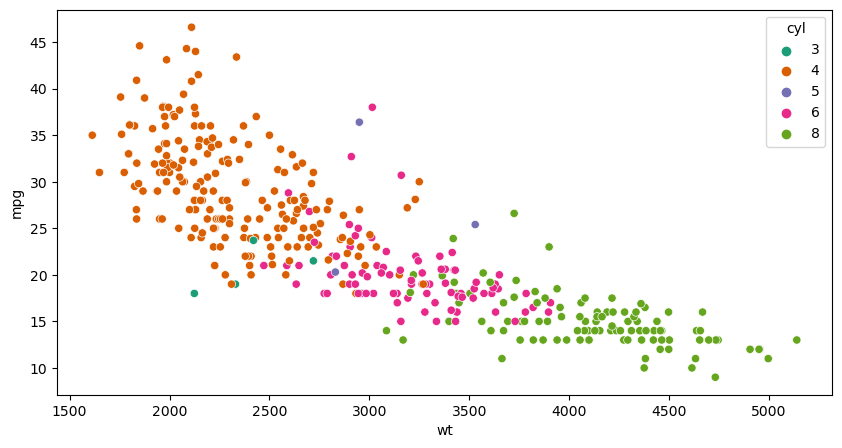

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='wt', y = 'mpg',data=car_df, hue='cyl', palette='Dark2')

### G. Share insights for Q2.f.

Observations:

* As the weight increases, mpg also decreases, hence they are negative correlated
* Cars with high wt and low mpg have most number of cyl.

### H. Check for unexpected values in all the features and datapoints with such values.

In [15]:
"""
:param df - dataFrame

This method takes dataframe as input and outputs unique values in each column/entries of dataFrame.

"""
def unique_val(df):
    for i in df.columns:
        print(f'unique values in {i} : ')
        print(df[i].unique(), "\n")
unique_val(car_df)

unique values in car_name : 
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyot

In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- Horsepower (hp) is continuous variable but its datatype as shown above is object, which is for categorical data types. Extracting and printing non numeric values in hp column

In [17]:
hp_is_digit = pd.DataFrame(car_df.hp.str.isdigit())
car_df[hp_is_digit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [18]:
car_df = car_df.replace('?', np.nan)
car_df[hp_is_digit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [19]:
car_df.hp.isna().value_counts()

False    392
True       6
Name: hp, dtype: int64

In [20]:
car_df.hp.isna().sum() * 100 / len(car_df.hp)

1.5075376884422111

__Observation:__

* the unexpected values exists only in `hp` and these are just 1.5% - so instead of imputing them we can remove these entries and use these entries later to for (3. G - Pass a new DataPoint and predict which cluster it belongs to).

    * remove the unexpected values/ NAN from the dataframe & use the new df for model building.
    * create a new df with NaN entries which are updated with `median` - then use these entries for cluster predicting using the model.

In [21]:
predict_df = car_df.copy()
predict_df = predict_df[predict_df.hp.isna()]
predict_df['hp'].fillna(car_df['hp'].median(), inplace=True)
predict_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,1


In [22]:
predict_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [23]:
car_df.dropna(inplace=True)
car_df.count()

car_name    392
mpg         392
cyl         392
disp        392
hp          392
wt          392
acc         392
yr          392
origin      392
dtype: int64

## 3. Clustering

In [24]:
car_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

<!-- __Observations:_

* There is no  -->

In [25]:
car_df = car_df.drop('car_name', axis=1)
car_df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [26]:
from scipy.stats import zscore
cols = car_df.columns.drop('origin')
car_df[cols] =car_df[cols].apply(zscore)
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,1


In [27]:
car_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,-1.840931e-16,-1.699321e-16,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16,-9.754102e-16,1.576531
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,0.805518
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,1.000000
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,1.000000
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,1.000000
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,2.000000
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,3.000000


### A. Apply K-Means clustering for 2 to 10 clusters.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_err = []
cluster_val = range(2,10)
for i in cluster_val:
    clusters = KMeans(i, n_init = 5, random_state=10)
    clusters.fit(car_df)
    centroids = clusters.cluster_centers_
    labels = clusters.labels_
    cluster_err.append(clusters.inertia_)

In [29]:
clusters_df = pd.DataFrame({"num_clusters": cluster_val, "cluster_errors": cluster_err})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1466.971254
1,3,1094.851292
2,4,887.141916
3,5,781.940825
4,6,712.113708
5,7,642.277997
6,8,601.938753
7,9,560.819897


### B. Plot a visual and find elbow point. 

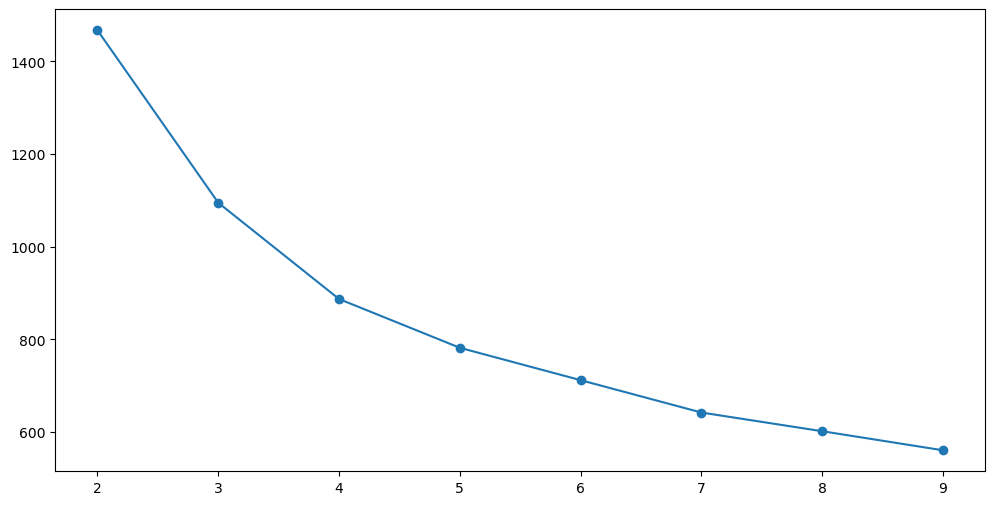

In [30]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### C. On the above visual, highlight which are the possible Elbow points.

Observations:

* The recognised elbow points from the graph are 4, 5
* we will find the best optimal cluster using silhouette_score

In [31]:
recognised_k_clusters = [4,5]
data = []
for i in recognised_k_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(car_df)
    labels = kmeans.labels_
    data.append([i, round(silhouette_score(car_df,labels),2)])

In [32]:
silhouette_score_df = pd.DataFrame(data, columns = ['Cluster', 'Silhouette_Score'])
silhouette_score_df

,Cluster,Silhouette_Score
0,4,0.32
1,5,0.32


In [33]:
optimal_cluster = silhouette_score_df[silhouette_score_df.Silhouette_Score == silhouette_score_df.Silhouette_Score.max()]
optimal_cluster

,Cluster,Silhouette_Score
0,4,0.32
1,5,0.32


Observations:

* we see the silhouette score to the be  same for both k=4 and 5, choosing k=4 as it is optimal

### D. Train a K-means clustering model once again on the optimal number of clusters. 

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(car_df)
labels = kmeans.labels_
silhouette_score(car_df,labels)

0.31976713338579593

In [35]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 94 108  87 103]


In [36]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(car_df) )
centroid_df.transpose()

,0,1,2,3
mpg,-1.156649,1.209150,-0.498836,0.209083
cyl,1.483947,-0.809663,0.397678,-0.841218
disp,1.489139,-0.784034,0.327103,-0.813217
hp,1.506794,-0.741061,-0.062742,-0.545102
wt,1.391452,-0.773426,0.344023,-0.749480
acc,-1.075993,0.364063,0.356276,0.299307
yr,-0.682654,1.138091,0.014920,-0.582936
origin,1.000000,2.037037,1.045977,2.067961


### E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [37]:
predict = kmeans.predict(car_df)
predict
car_df["group"] = predict
car_df['group'] = car_df['group'].astype('category')
car_df.dtypes

mpg        float64
cyl        float64
disp       float64
hp         float64
wt         float64
acc        float64
yr         float64
origin       int64
group     category
dtype: object

### F. Plot a visual and color the datapoints based upon clusters.

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[group]'>,
        <AxesSubplot:>]], dtype=object)

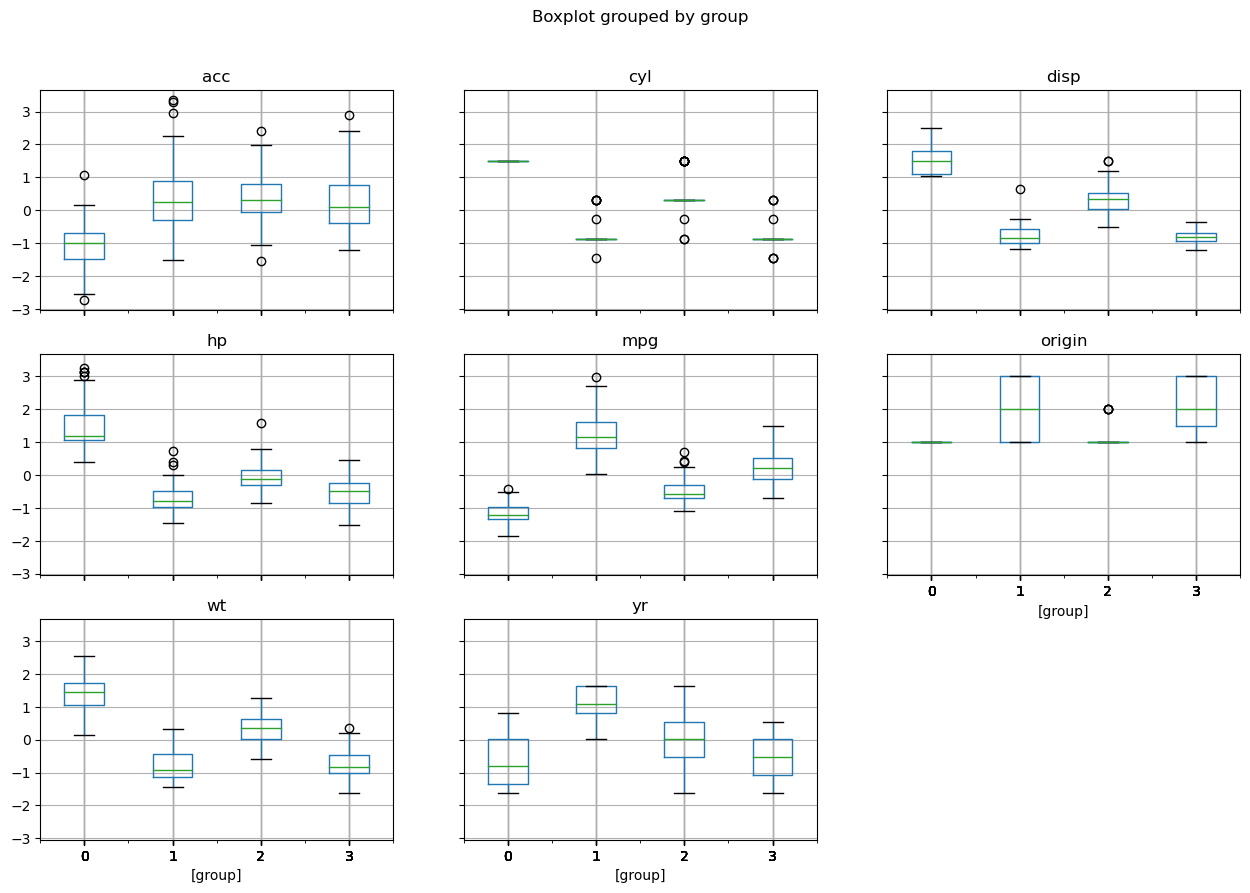

In [38]:
# Plotting the centers

car_df["group"] = predict
car_df.boxplot(by = 'group',  figsize=(15, 10))

Observations:

* Too many outliers in every feature/dimension.
* Handling the outliers by updating them with particular group median values.

In [39]:
# Handling the outliers on an individual group level
       
def handling_outliers(group):
    median, std = group.median(), group.std()  
    outliers = (group - median).abs() > 2*std # if absolute values of group - median > 2std then we consider that as an outlier
    group[outliers] = group.median()       
    return group

corrected_data = (car_df.groupby('group').transform(handling_outliers)) 
data = corrected_data.join(pd.DataFrame(car_df['group']))

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[group]'>]],
      dtype=object)

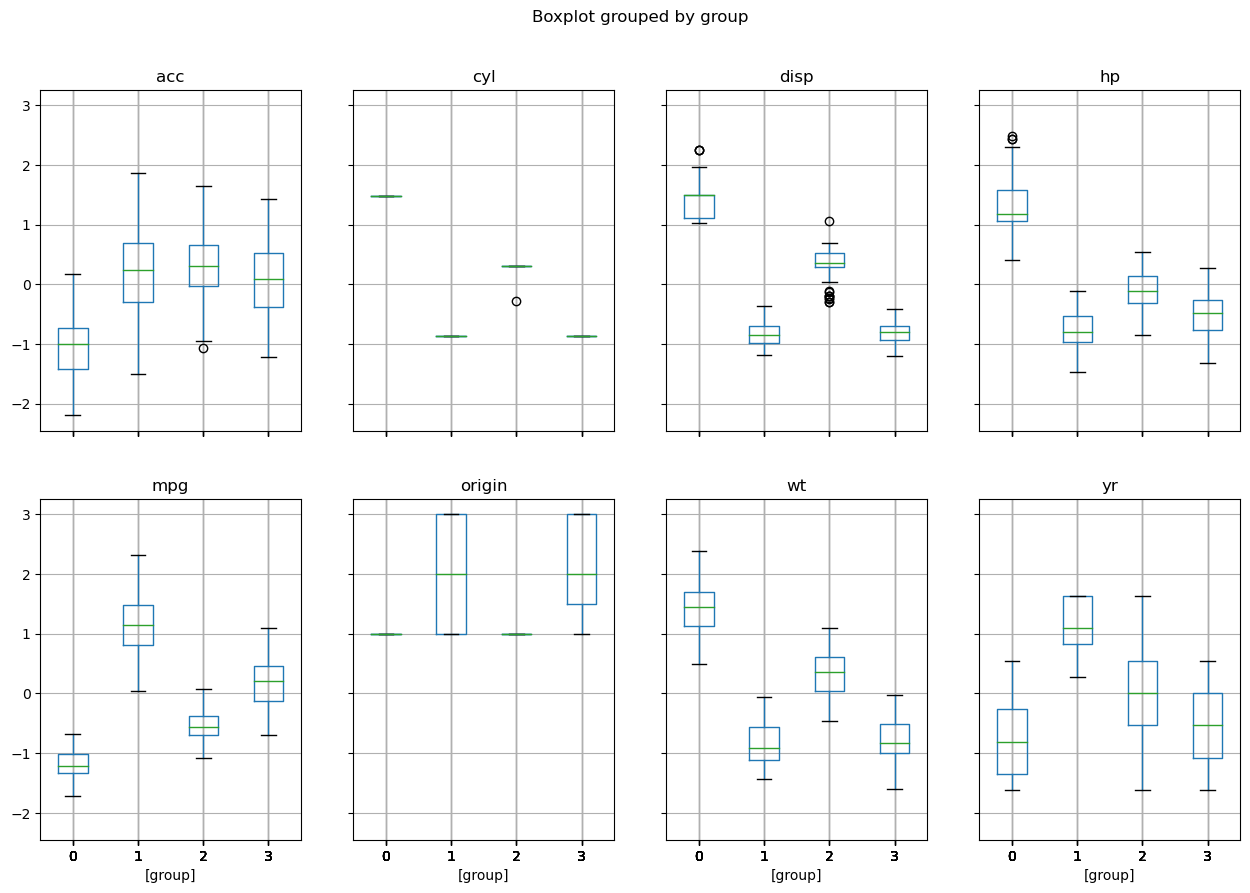

In [40]:
data.boxplot(by = 'group', layout=(2,4), figsize=(15, 10))

Observations:

* The new plots have handled most of the outliers.

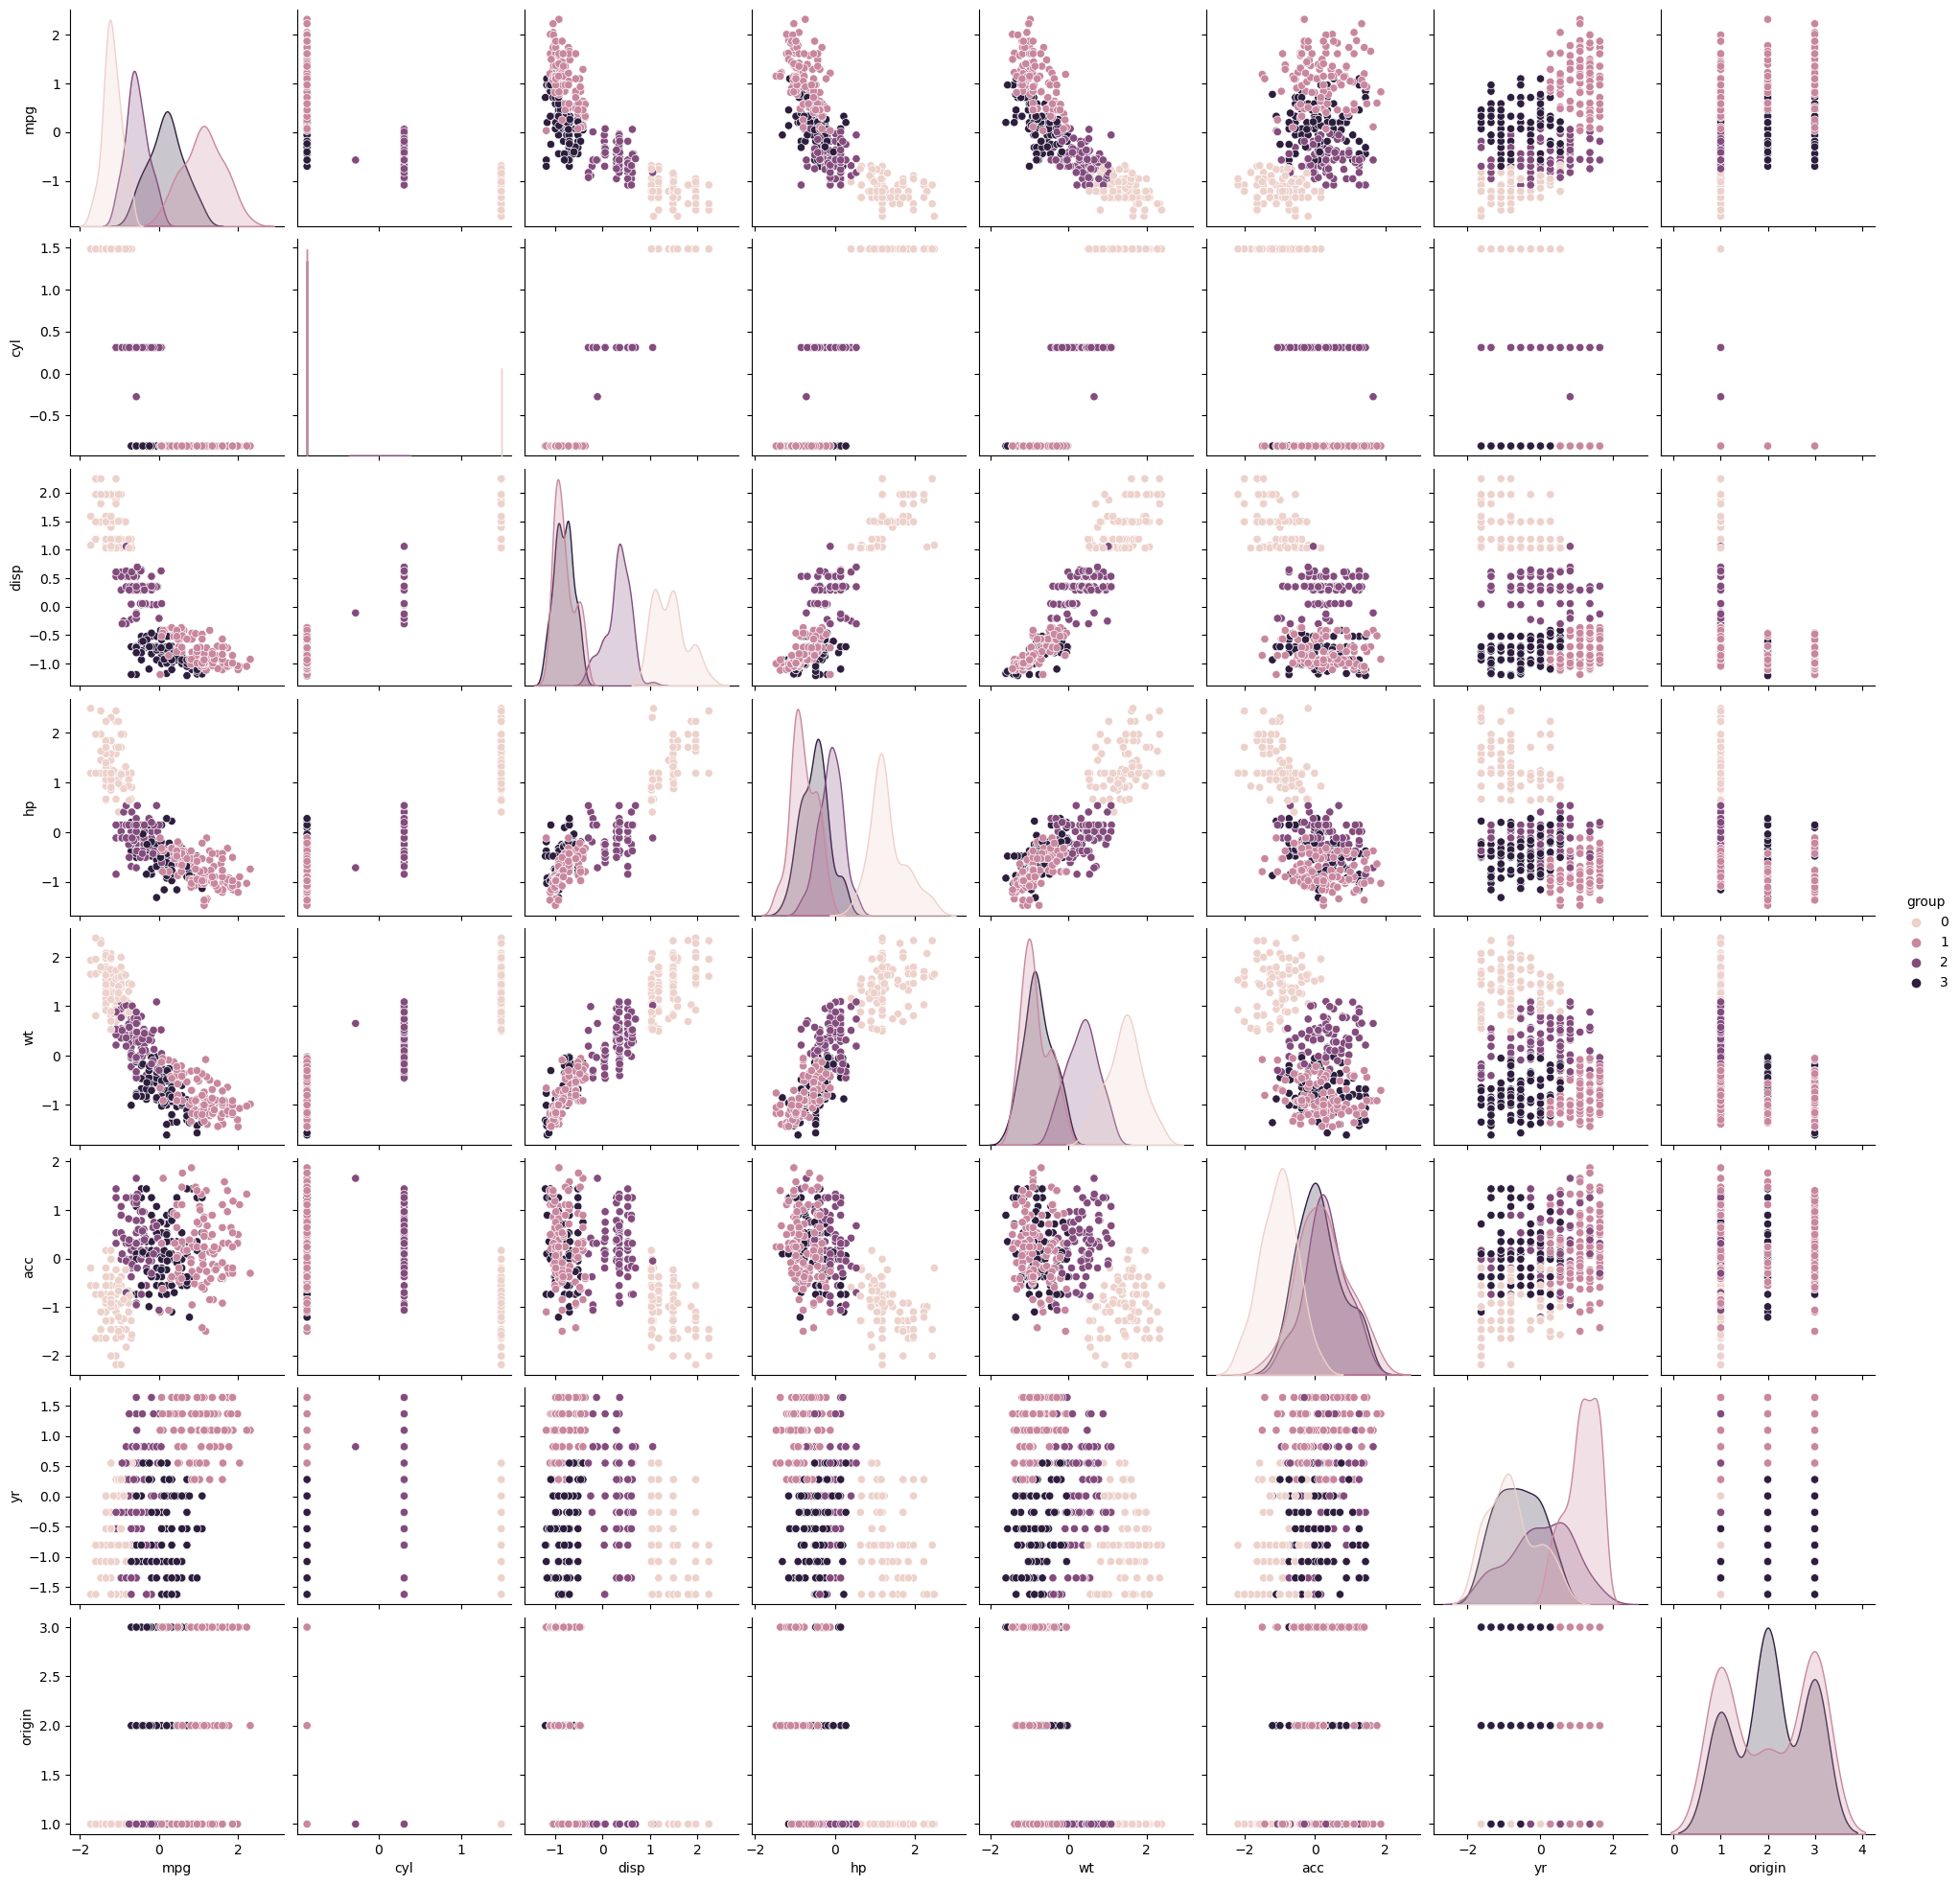

In [41]:
sns.pairplot(data, diag_kind='kde', hue='group')

### G. Pass a new DataPoint and predict which cluster it belongs to.

* Using **predict_df** the one that had data entries with missing hp values. Pass a new DataPoint and predict which cluster it belongs to

In [42]:
df = predict_df.copy()
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,1


In [43]:
df = df.drop('car_name', axis=1).reset_index()

In [44]:
df.drop(['index'], axis=1, inplace=True)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,25.0,4,98.0,93.5,2046,19.0,71,1
1,21.0,6,200.0,93.5,2875,17.0,74,1
2,40.9,4,85.0,93.5,1835,17.3,80,2
3,23.6,4,140.0,93.5,2905,14.3,80,1
4,34.5,4,100.0,93.5,2320,15.8,81,2
5,23.0,4,151.0,93.5,3035,20.5,82,1


In [45]:
from scipy.stats import zscore
cols = ['mpg', 'cyl', 'disp', 'wt', 'acc', 'yr']
df[cols] =df[cols].apply(zscore)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.416680,-0.447214,-0.783869,93.5,-0.991983,0.833573,-1.732051,1
1,-0.972253,2.236068,1.795312,93.5,0.808792,-0.156811,-0.989743,1
2,1.791724,-0.447214,-1.112588,93.5,-1.450323,-0.008253,0.494872,2
3,-0.611131,-0.447214,0.278147,93.5,0.873959,-1.493829,0.494872,1
4,0.902807,-0.447214,-0.733297,93.5,-0.396793,-0.751041,0.742307,2
5,-0.694467,-0.447214,0.556294,93.5,1.156348,1.576361,0.989743,1


In [46]:
# hp value is constant,so replace it with 0/1 and make it scale independent
df.hp = df.hp.replace([93.5],1)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.416680,-0.447214,-0.783869,1.0,-0.991983,0.833573,-1.732051,1
1,-0.972253,2.236068,1.795312,1.0,0.808792,-0.156811,-0.989743,1
2,1.791724,-0.447214,-1.112588,1.0,-1.450323,-0.008253,0.494872,2
3,-0.611131,-0.447214,0.278147,1.0,0.873959,-1.493829,0.494872,1
4,0.902807,-0.447214,-0.733297,1.0,-0.396793,-0.751041,0.742307,2
5,-0.694467,-0.447214,0.556294,1.0,1.156348,1.576361,0.989743,1


In [47]:
predict = kmeans.predict(df)
pred_centroids =  kmeans.cluster_centers_
pred_labels = kmeans.labels_
predict_df['group'] = predict
predict_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,group
32,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,1,3
126,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1,0
330,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,2,1
336,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,1,2
354,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,2,1
374,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,1,2



# PART - B

## 1. Data Understanding & Cleaning

### A. Read ‘vehicle.csv’ and save as DataFrame.

In [48]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [49]:
vehicle_df_shape = vehicle_df.shape
print(f'The shape of vehicle dataset: {vehicle_df_shape} ; The number of rows: {vehicle_df_shape[0]} ; The number of columns: {vehicle_df_shape[1]}')

The shape of vehicle dataset: (846, 19) ; The number of rows: 846 ; The number of columns: 19


In [50]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

###  B. Check percentage of missing values and impute with correct approach.

In [51]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [52]:
perc_miss = vehicle_df.isnull().sum() * 100 / len(vehicle_df)
missing_df = pd.DataFrame({'Percentage of Missing Values': perc_miss})
missing_df

,Percentage of Missing Values
compactness,0.000000
circularity,0.591017
distance_circularity,0.472813
radius_ratio,0.709220
pr.axis_aspect_ratio,0.236407
max.length_aspect_ratio,0.000000
scatter_ratio,0.118203
elongatedness,0.118203
pr.axis_rectangularity,0.354610
max.length_rectangularity,0.000000


Observations:

* The rows with one or more null will be imputed using missing values.

In [53]:
# Clean the data -  missing values are replaced by median. 

for i in vehicle_df.columns[vehicle_df.isnull().any(axis=0)]:
    vehicle_df[i].fillna(vehicle_df[i].median(),inplace=True)

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [54]:
#As the variables are categorical, we use value_counts function
pd.value_counts(vehicle_df['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

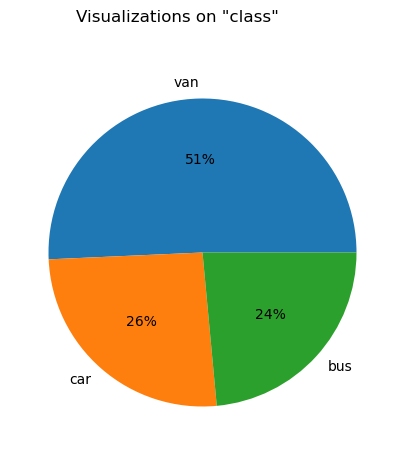

In [55]:
def df_pie_charts(df, cols):
    for i in cols:
        fig , axes = plt.subplots(1,1, figsize=(20,5))
        axes.pie(df[i].value_counts(), labels = df[i].unique(), autopct='%.00f%%')
        fig.suptitle(f'Visualizations on "{i}"')
df_pie_charts(vehicle_df, ['class'])

Observations:

* Class 2 has 51 % data entries
* Class 1 and 3 has almost same percentage of data entries

### D. Check for duplicate rows in the data and impute with correct approach. 

In [56]:
vehicle_df.duplicated().sum()

0

Observations:

* The dataset has no duplicate entries.

## 2. Data Preparation

* As we know that PCA assumes the data to be free of outliers. Hence, handling them is necessary

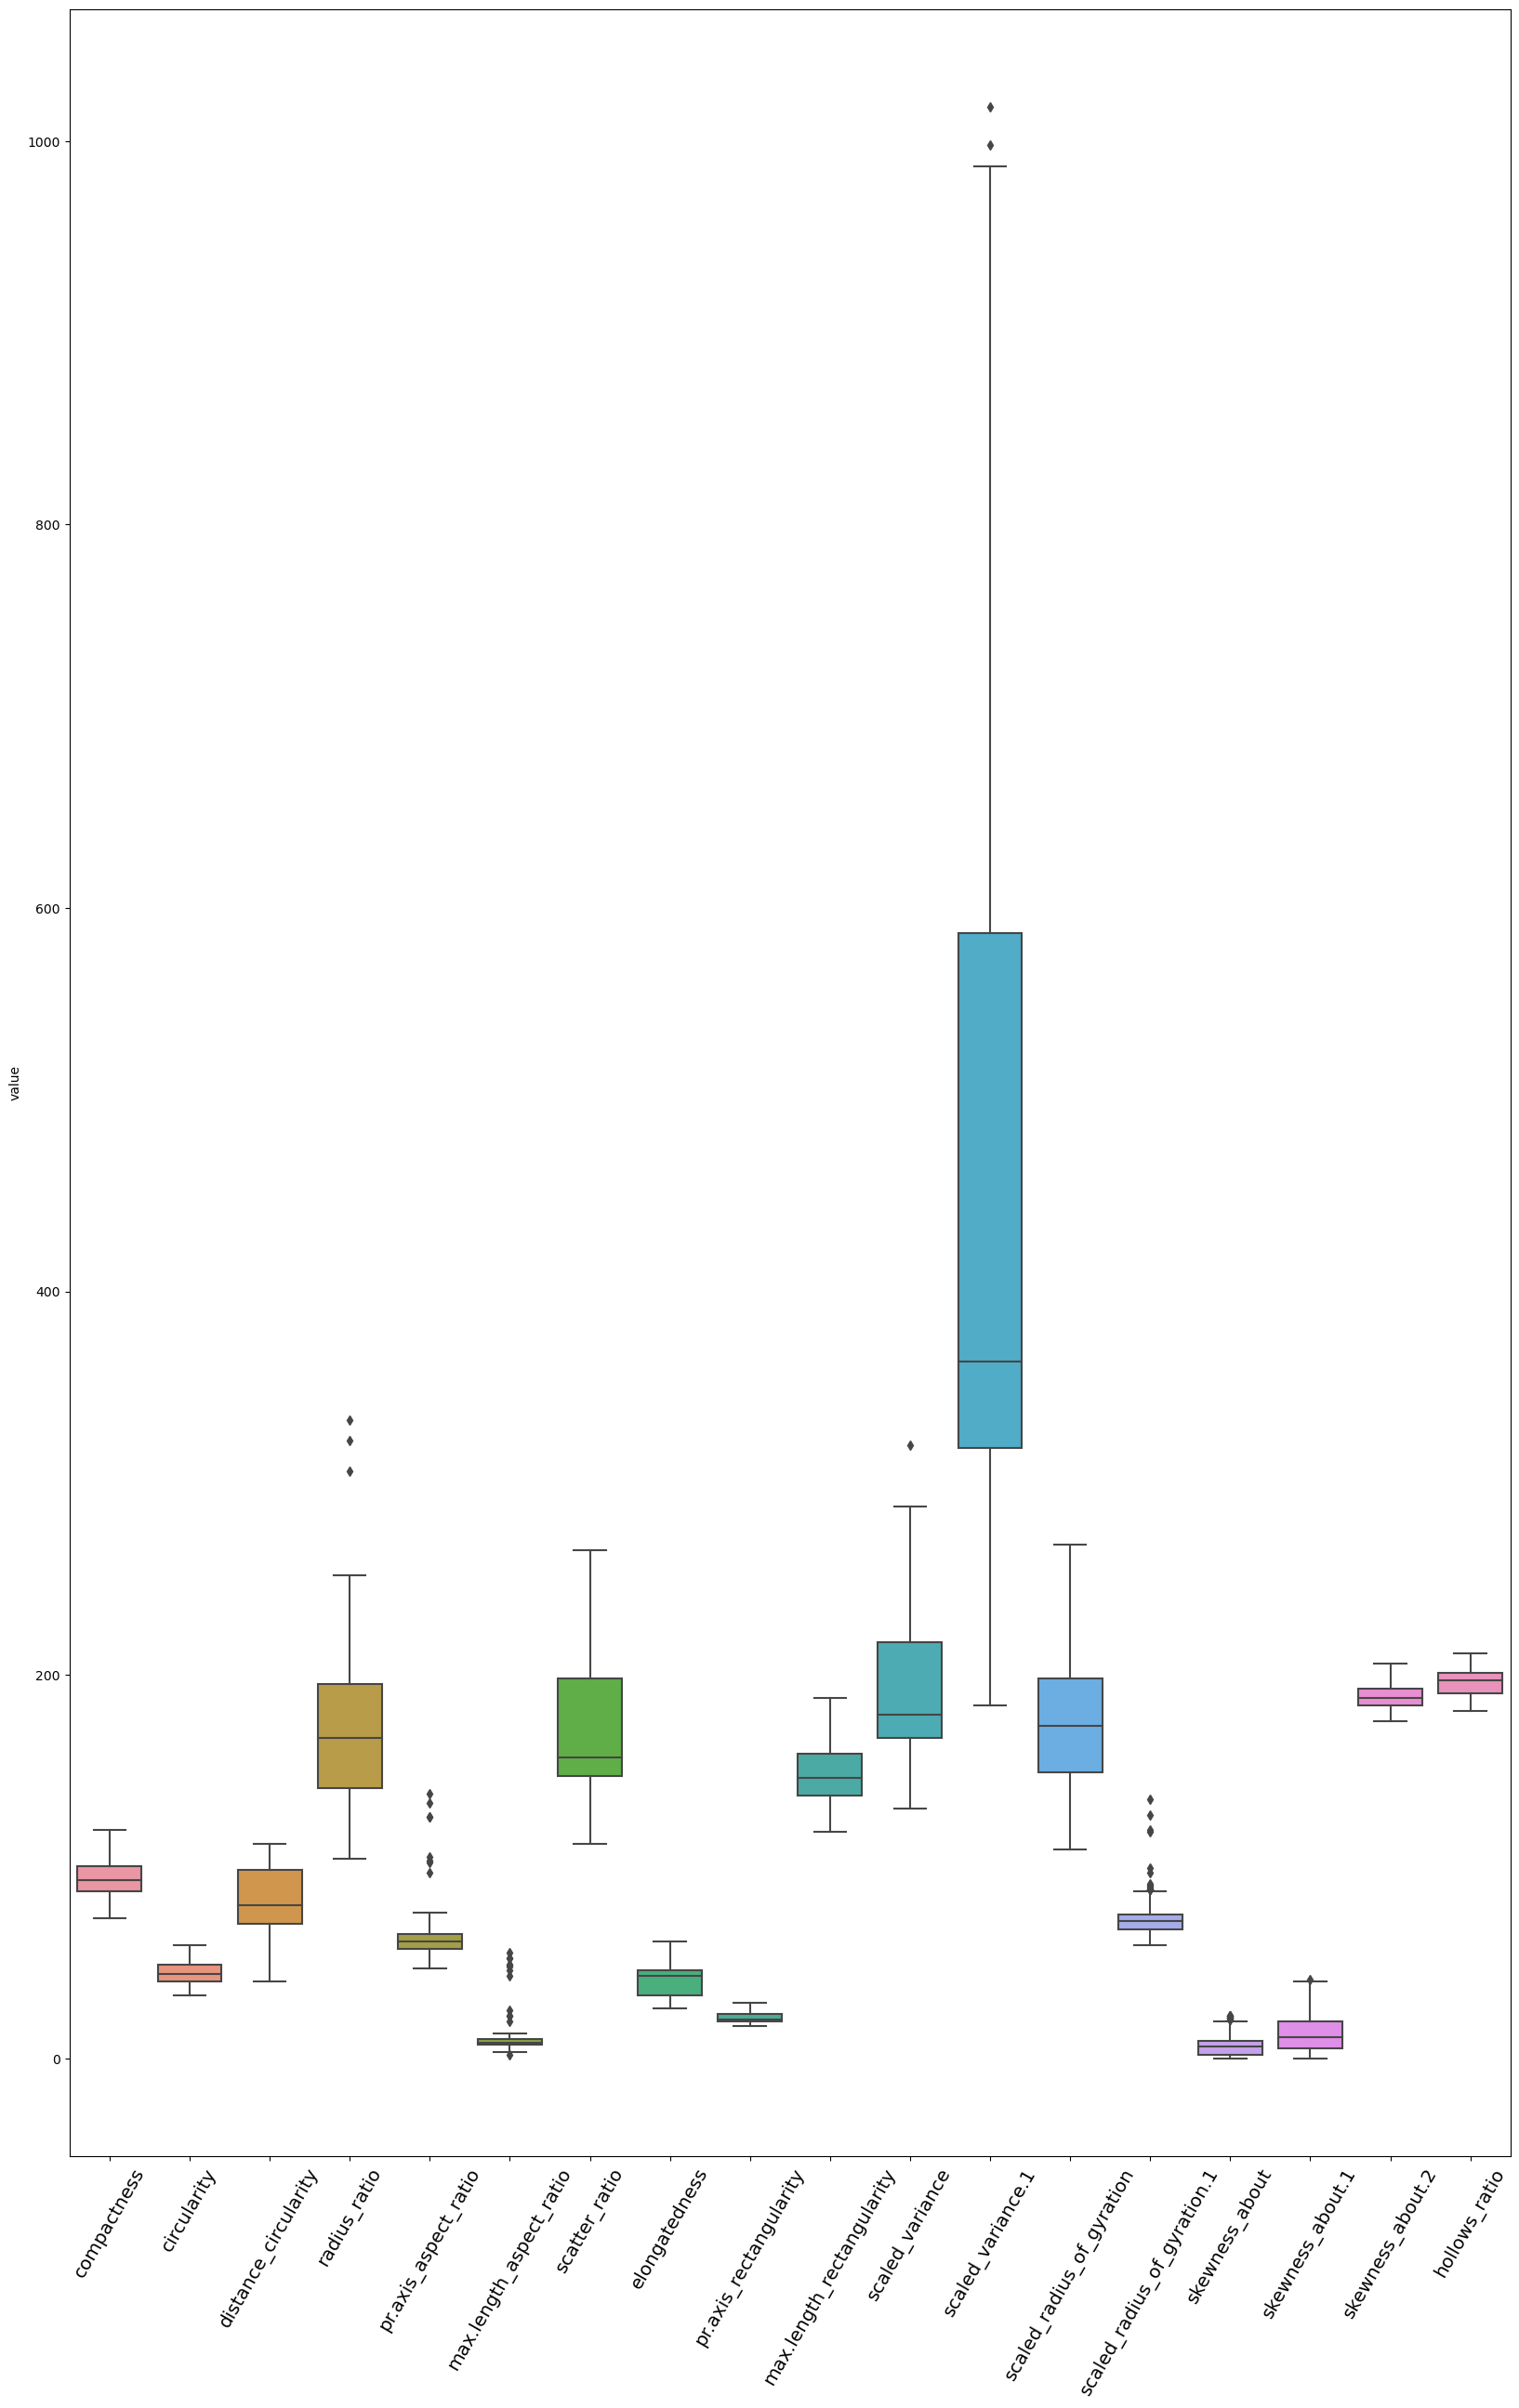

In [57]:
def boxplot_(xSize, ySize, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), ax=axes)
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontsize='x-large')
boxplot_(20,30, data =vehicle_df.iloc[:,:18])

Observations:

* Outliers are seen in columns - **pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration.1, radius_ratio, scaled_variance.1, scaled_variance, skewness_about, skewness_about.1**
* All other features are evenly distributed.

In [58]:
def imputing_outliers(df, cols):
    for col_name in cols:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()
    return df

vehicle_df = imputing_outliers(vehicle_df, vehicle_df.columns.drop('class'))
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,61.0,8,149.0,45.0,19.0,144,241.0,325.0,188.0,71.5,9.0,11.0,180.0,183,bus


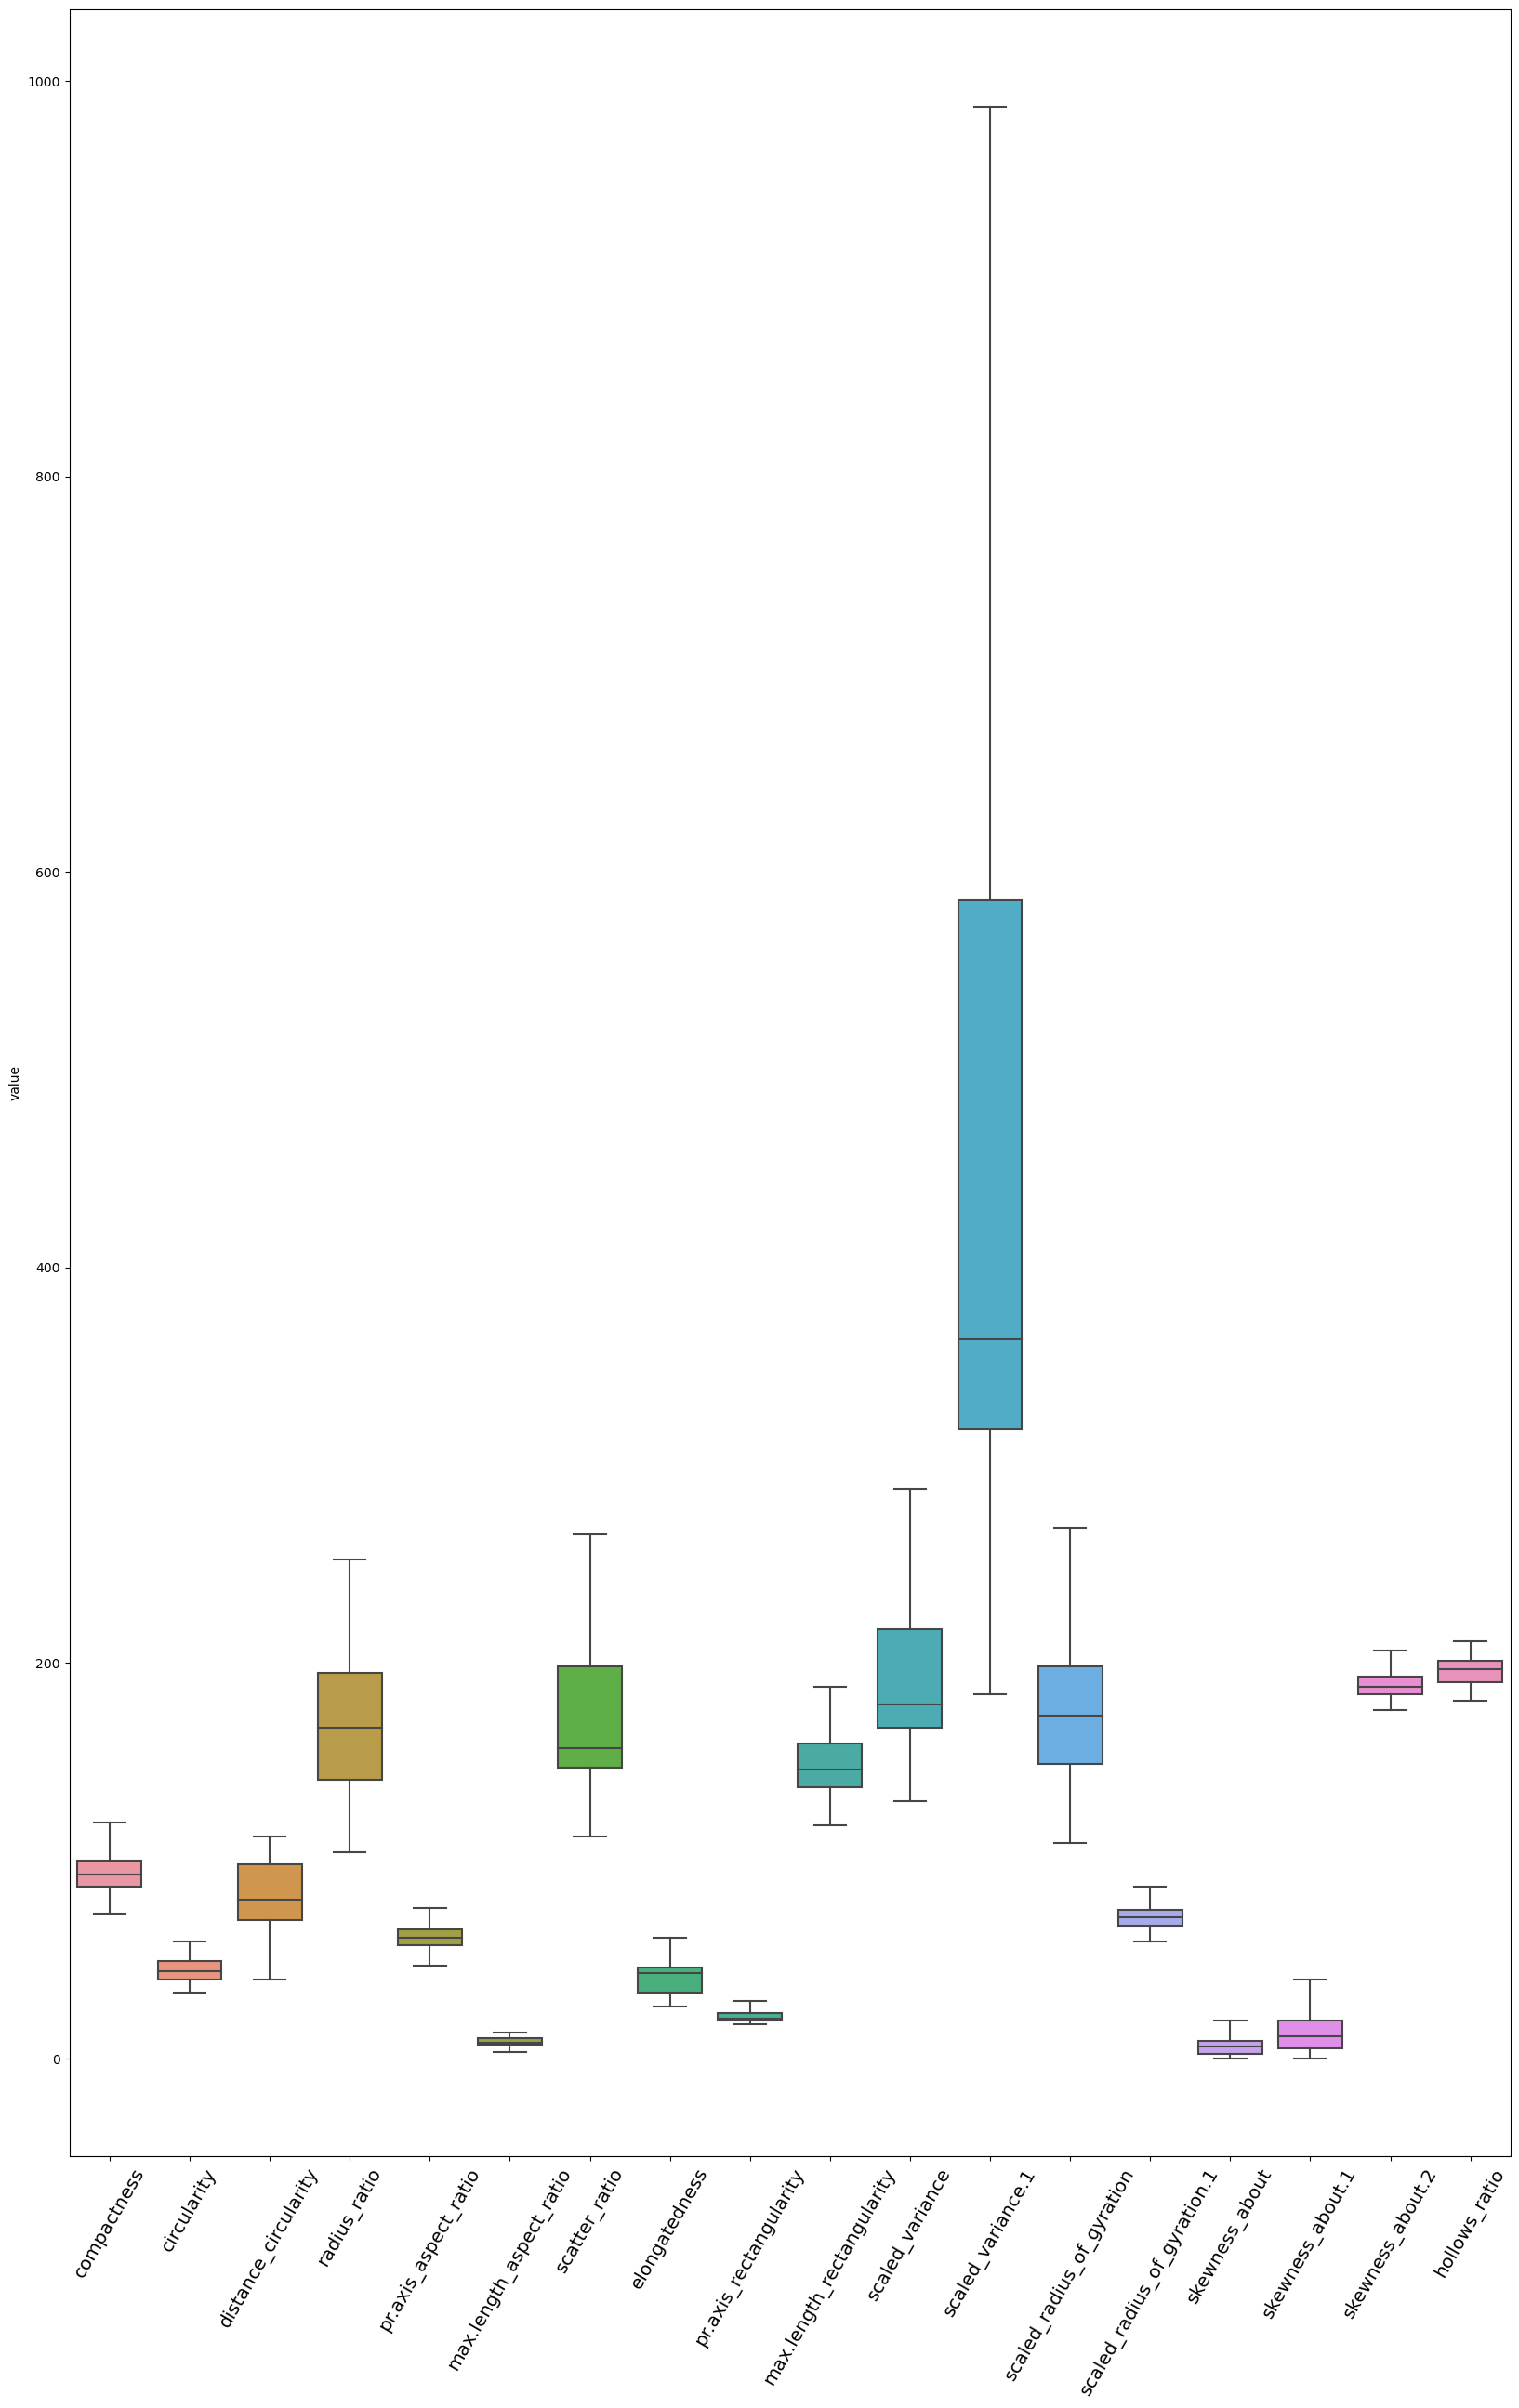

In [59]:
boxplot_(20,30, data =vehicle_df.iloc[:,:18])

Observations:

* In the new plot we see that the outliers are handled properly

In [60]:
from sklearn.preprocessing import LabelEncoder 

def encode(col, data):
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col]) # returns label encoded variable(s)
    return data

vehicle_df = encode('class', vehicle_df)

### A. Split data into X and Y. [Train and Test optional]

In [61]:
X=vehicle_df.drop(columns='class')
y=vehicle_df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

### B. Standardize the Data. 

In [62]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## 3. Model Building

### A. Train a base Classification model using SVM.

In [63]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_sd, y_train)
predict = svc_model.predict(X_test_sd) 

### B. Print Classification metrics for train data. 

In [64]:
print(f"Train Score: {svc_model.score(X_train_sd, y_train)}")
print(f"Test Score: {svc_model.score(X_test_sd, y_test)}")

Train Score: 0.9748520710059172
Test Score: 0.9529411764705882


In [65]:
print("Confusion Matrix:\n", confusion_matrix(predict,y_test))

Confusion Matrix:
 [[44  0  0]
 [ 0 84  3]
 [ 0  5 34]]


In [66]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.94      0.97      0.95        87
           2       0.92      0.87      0.89        39

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



### C. Apply PCA on the data with 10 components.

In [67]:
cov_matrix = np.cov(X_train_sd,rowvar=False)
print(cov_matrix)

[[ 1.00148148  0.69100362  0.79310322  0.7145009   0.19355492  0.52849572
   0.81063233 -0.78475977  0.81329758  0.6899308   0.76159776  0.80608394
   0.59127062 -0.2516575   0.21137555  0.16521475  0.30573255  0.37699504]
 [ 0.69100362  1.00148148  0.78957672  0.65058612  0.2284675   0.56016686
   0.84660296 -0.8210884   0.84106246  0.96297089  0.80220998  0.82957904
   0.92494693  0.05759688  0.14743975  0.00716628 -0.08196764  0.06721806]
 [ 0.79310322  0.78957672  1.00148148  0.79254327  0.24668067  0.68056016
   0.90531869 -0.91102111  0.89432078  0.77825555  0.86695853  0.88562017
   0.70505227 -0.23163518  0.11600993  0.27584539  0.15590587  0.34427571]
 [ 0.7145009   0.65058612  0.79254327  1.00148148  0.64826927  0.48920145
   0.77161171 -0.82552904  0.74663661  0.60012563  0.78631571  0.75891288
   0.56102556 -0.38835704  0.04209536  0.18742249  0.40291222  0.4977144 ]
 [ 0.19355492  0.2284675   0.24668067  0.64826927  1.00148148  0.1705758
   0.20341724 -0.30763846  0.171438

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train_sd)

PCA(n_components=10)

In [69]:
print(pca.explained_variance_) #eigen values

[9.79711012 3.3281418  1.17855509 1.14159653 0.84954854 0.6629465
 0.32823896 0.23181763 0.12762044 0.08251271]


In [70]:
print(pca.components_) #eigen vectors

[[ 2.72161231e-01  2.86323576e-01  3.01453151e-01  2.70290726e-01
   1.01453277e-01  1.99314318e-01  3.09310948e-01 -3.07767673e-01
   3.06113064e-01  2.78940975e-01  2.97765970e-01  3.04776024e-01
   2.62449120e-01 -4.48026991e-02  4.12740919e-02  6.29816701e-02
   4.26090013e-02  9.03546528e-02]
 [-8.35189130e-02  1.26782934e-01 -4.29744514e-02 -1.89865816e-01
  -2.55135014e-01 -1.19128353e-01  8.00327577e-02 -1.85602489e-02
   9.09226515e-02  1.16221540e-01  8.58435490e-02  7.99593442e-02
   2.09593648e-01  5.07028536e-01 -6.26788978e-03 -8.06081895e-02
  -5.02093367e-01 -5.07780018e-01]
 [ 1.91923417e-02 -2.05293032e-01  1.09832494e-01 -4.67528664e-02
  -3.05818302e-01 -2.56483372e-03  9.91323847e-02 -5.70066193e-02
   1.07503491e-01 -1.83616699e-01  1.04514385e-01  9.66293307e-02
  -2.29147607e-01  1.10313565e-02 -2.94888251e-01  7.91296245e-01
  -7.31462610e-02  2.63133989e-03]
 [ 1.65476605e-01  3.05504229e-02  6.92458146e-02 -2.41036589e-01
  -5.17608137e-01  2.58942470e-01 -3.

In [71]:
# Percentage of variation explained by each eigen Vector.
print(pca.explained_variance_ratio_)

[0.54347874 0.18462325 0.06537843 0.06332821 0.04712732 0.03677588
 0.01820852 0.01285971 0.00707954 0.00457726]


### D. Visualize Cumulative Variance Explained with Number of Components. 

Text(0, 0.5, 'Cumulative Variance Explained')

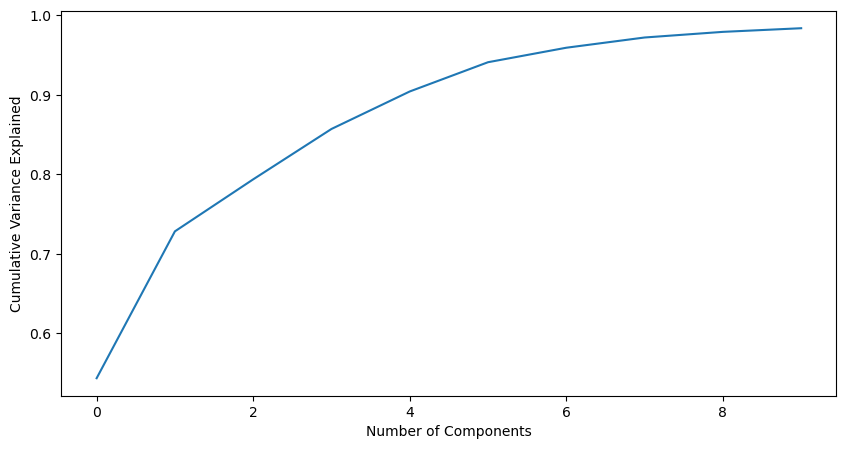

In [72]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

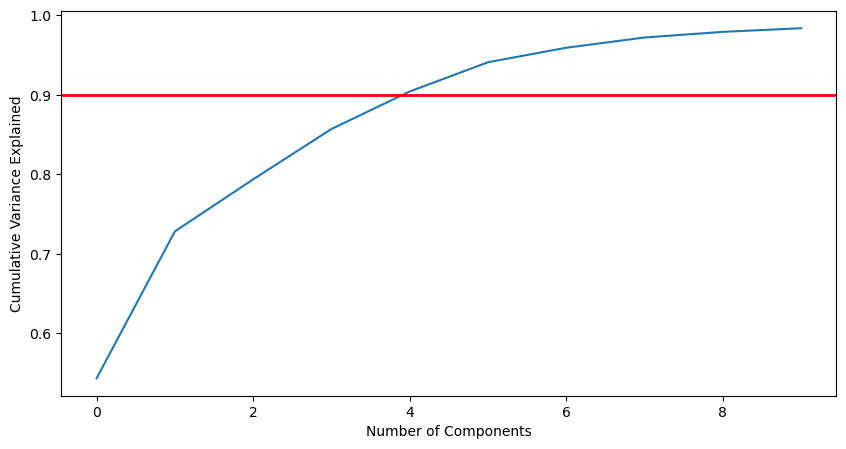

In [73]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.9, linewidth=2, label= 'horizontal-line', color = 'r')

Observations:

* The plot shows that at least 90% variance can be covered with 4 or more components.
* We shall be using 4-components for our pca model

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [74]:
X_sd =StandardScaler().fit_transform(X)
pca_4components = PCA(n_components=4)
pca_4components.fit(X_sd)

PCA(n_components=4)

In [75]:
#eigen values
print(pca_4components.explained_variance_)

[9.74940269 3.35071912 1.19238155 1.13381916]


In [76]:
#eigen vectors
print(pca_4components.components_)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.2011469   0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.0908527   0.10607049 -0.2136847   0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224072 -0.04170535]
 [ 0.13867501 -0.03805552  0.1089543  -0.25435509 -0.61276572  0.27867815
   0.00539294  0.06521491  0.03089917  0.0414675  -0.06400505 -0.00219686
  -0.08553964 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603751]]


In [77]:
# Percentage of variation explained by each eigen Vector.
print(pca_4components.explained_variance_ratio_)

[0.54099325 0.18593103 0.06616512 0.0629155 ]


In [78]:
pca_4components_X_sd= pca_4components.transform(X_sd)

In [79]:
display(pca_4components_X_sd)

array([[ 0.58422804, -0.67567325, -0.45333356, -0.75065628],
       [-1.5121798 , -0.34893367, -0.33343619,  1.26895262],
       [ 3.91344816,  0.2345073 , -1.26509352,  0.13722412],
       ...,
       [ 5.12009307, -0.18227007, -0.50836784, -0.99309528],
       [-3.29709502, -1.10194286,  1.93384417,  0.44112617],
       [-4.96759448,  0.42274968,  1.30871531,  0.29194153]])

### G. Train SVM model on components selected from above step.

In [80]:

from sklearn.model_selection import train_test_split
X_train_pca_4components, X_test_pca_4components, y_train, y_test = train_test_split(pca_4components_X_sd, y, test_size = 0.2, random_state = 10)

In [81]:
from sklearn import svm
from sklearn.svm import SVC
svc_model_pca = SVC()
svc_model_pca.fit(X_train_pca_4components, y_train.values.ravel())
pred_pca_4components = svc_model_pca.predict(X_test_pca_4components)

### H. Print Classification metrics for train data of above model and share insights. 

In [82]:
train_accuracy_pca_4components = svc_model_pca.score(X_train_pca_4components, y_train)
print('Train accuracy using PCA 4 components: ', train_accuracy_pca_4components)
test_accuracy_pca_4components = svc_model_pca.score(X_test_pca_4components, y_test)
print('Test accuracy using PCA 4 components: ', test_accuracy_pca_4components)

Train accuracy using PCA 4 components:  0.8210059171597633
Test accuracy using PCA 4 components:  0.7823529411764706


In [83]:
print("Confusion Matrix:\n", confusion_matrix(pred_pca_4components, y_test))

Confusion Matrix:
 [[36  2  5]
 [ 7 72  7]
 [ 1 15 25]]


In [84]:
print(classification_report(pred_pca_4components, y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.81      0.84      0.82        86
           2       0.68      0.61      0.64        41

    accuracy                           0.78       170
   macro avg       0.77      0.76      0.76       170
weighted avg       0.78      0.78      0.78       170



Observations:

* Test data accuracy previous to dimension reduction using PCA 4 components was 95%
* Test data accuracy after dimension reduction using PCA 4 components is 78%
    * Clearly, we see a 7% drop in the accuracy.
    * A reason to this is we just used 4-components  1/4 of the original features.

## 4. Performance Improvement

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

* Let's now consider 6 - components as it covers around 95% of the variation.

In [85]:
pca_6components = PCA(n_components=6)
pca_6components.fit(X_sd)

PCA(n_components=6)

In [86]:
#eigen values
print(pca_6components.explained_variance_)

[9.74940269 3.35071912 1.19238155 1.13381916 0.88399731 0.66626575]


In [87]:
#eigen vectors
print(pca_6components.components_)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034373
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710146 -0.13899557 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.07907344  0.08164

In [88]:
# Percentage of variation explained by each eigen Vector.
print(pca_6components.explained_variance_ratio_)

[0.54099325 0.18593103 0.06616512 0.0629155  0.04905291 0.03697101]


In [89]:
pca_6components_X_sd= pca_6components.transform(X_sd)

In [90]:
display(pca_6components_X_sd)

array([[ 0.58422804, -0.67567325, -0.45333356, -0.75065628, -0.77751466,
        -1.84880884],
       [-1.5121798 , -0.34893367, -0.33343619,  1.26895261, -0.32492864,
        -0.11831711],
       [ 3.91344816,  0.2345073 , -1.26509352,  0.13722411,  0.91575098,
        -0.68559401],
       ...,
       [ 5.12009307, -0.18227007, -0.50836784, -0.9930953 , -1.32038003,
         0.17264281],
       [-3.29709502, -1.10194286,  1.93384417,  0.44112618, -0.5020676 ,
         0.02003877],
       [-4.96759448,  0.42274968,  1.30871531,  0.29194152, -0.17468618,
         0.38469258]])

In [91]:
from sklearn.model_selection import train_test_split
X_train_pca_6components, X_test_pca_6components, y_train, y_test= train_test_split(pca_6components_X_sd, y, test_size = 0.2, random_state = 10)

In [92]:
from sklearn import svm
from sklearn.svm import SVC
svc_model_pca_6components = SVC()
svc_model_pca_6components.fit(X_train_pca_6components, y_train.values.ravel())
pred_pca_6components = svc_model_pca_6components.predict(X_test_pca_6components)

* Tuning the parameters to improve performance:

In [93]:
from sklearn.model_selection import GridSearchCV

def best_model(model, parameters, x, y):
    clf = GridSearchCV(model, parameters, scoring='accuracy')
    clf.fit(x, y)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [95]:
parameters = {'kernel':('rbf', 'poly', 'sigmoid'),
              'gamma':('scale','auto'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'class_weight': (None, 'balanced')}
clf = best_model(svc_model_pca_6components, parameters, X_train_pca_6components, y_train)

0.9200762527233117
{'C': 0.8, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=0.8, gamma='auto')


- Best params for svm/svc - **{'C': 0.8, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}**

In [96]:
svc_model_best = clf.best_estimator_

In [97]:
svc_model_best.fit(X_train_pca_6components, y_train.values.ravel())
pred_pca_6components = svc_model_pca_6components.predict(X_test_pca_6components)

In [98]:
train_accuracy_pca = svc_model_best.score(X_train_pca_6components, y_train)
print('Train accuracy using PCA 6-components: ', train_accuracy_pca)
test_accuracy_pca = svc_model_best.score(X_test_pca_6components, y_test)
print('Test accuracy using PCA 6-components: ', test_accuracy_pca)

Train accuracy using PCA 6-components:  0.9482248520710059
Test accuracy using PCA 6-components:  0.9117647058823529


### B. Share best Parameters observed from above step.

Observations:

* Best params for svm/svc - **{'C': 0.8, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}**
* Choosing the correct number of the pca components also has a great impact on the model performance. Hwe just add few more componets i.e from 4 to 6 components, makes a much greater diffrence in the accuracy

- Train accuracy using PCA 4 components:  0.8210059171597633 

- Test accuracy using PCA 4 components:  0.7823529411764706 

- Train accuracy using PCA 6-components:  0.9482248520710059 
- Test accuracy using PCA 6-components:  0.9117647058823529 

### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. 

In [99]:
print("Confusion Matrix:\n", confusion_matrix(pred_pca_6components, y_test))

Confusion Matrix:
 [[43  0  1]
 [ 1 80  4]
 [ 0  9 32]]


In [100]:
print(classification_report(pred_pca_6components, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.90      0.94      0.92        85
           2       0.86      0.78      0.82        41

    accuracy                           0.91       170
   macro avg       0.91      0.90      0.91       170
weighted avg       0.91      0.91      0.91       170



A Brief Summary:

* Accuracy of test data before dimensionality reduction - 95%
* Accuracy of test data after dimensionality reduction to 4 components - 78%
* Accuracy of test data after dimensionality reduction to 6 components - 91%
    * For PCA with 4 components - accuracy decreased by 7% compared to original SVC prediction
    * For PCA with 6 components - accuracy decreased by only 4% compared to original SVC prediction
    
* Implementing PCA with 6 components - we got balanced results on both test and train data. This accuracy is closer to the overall accuracy.
* Implementing PCA with 6-components for dimensionality reduction gives us good accuracy with reduced time complexity. 

### 5 A. Explain pre-requisite/assumptions of PCA. 

* PCA must and should be implemented only on continuous variables.

* PCA believes the existence of linear relationship among all variables.

* Data shoud have sampling adequacy - in order to product reliable results, large enough sample sizes are required - which satisfies pretty much all the permuation combinations that gonna needed between the features.

* Data must be suitable enough for performing dimensionality reduction - if there is no adequate correlations among the variables for them to be reduced to a smaller number of components then PCA might not do a great job of removing certain dimensions to reduce data.

* PCA has no considerable outliers.

### B. Explain advantages and limitations of PCA.

Advantages:

*  Eliminates the Correlated Features. 
    * If there is extreme correlation among features, PCA converts them into a single component.

* Better Performance
    * As PCA manages the curse of dimentionality, hence it yields better results in little time

* Decreases overfitting of the data.

* Improves Visualization, as the number of dimensions decrease significantly.
    * PCA helps easy interpretation of the data using visualizations.
    

Disadvantages:

* Reduced interpretability of independent variables .
    * The new features we derive from the existing one's. Thre is no way to interpret the newly formed dimensions.

* Previous to the implementation of the PCA performing data standardization is must 
    * PCA performs many permutaions and combinations to find the relations among the variables which needs standardiszation of data previous to applying it.
* Information Loss
    * On PCA implemntation, chances of loosing the data related to individual features is more.
    
* It is prone to outliers.